In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys

from fastai.imports import *
from structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn import metrics
import feather

In [2]:
#df_train = pd.read_csv('train.csv')

In [3]:
#df_test = pd.read_csv('test.csv')

In [4]:
#df_train.to_feather('train')
#df_test.to_feather('test')

In [5]:
df_train = feather.read_dataframe('train')
df_test = feather.read_dataframe('test')

In [6]:
df_test.isna().sum()

NU_INSCRICAO                 0
CO_UF_RESIDENCIA             0
SG_UF_RESIDENCIA             0
NU_IDADE                     0
TP_SEXO                      0
TP_COR_RACA                  0
TP_NACIONALIDADE             0
TP_ST_CONCLUSAO              0
TP_ANO_CONCLUIU              0
TP_ESCOLA                    0
TP_ENSINO                 3096
IN_TREINEIRO                 0
TP_DEPENDENCIA_ADM_ESC    3096
IN_BAIXA_VISAO               0
IN_CEGUEIRA                  0
IN_SURDEZ                    0
IN_DISLEXIA                  0
IN_DISCALCULIA               0
IN_SABATISTA                 0
IN_GESTANTE                  0
IN_IDOSO                     0
TP_PRESENCA_CN               0
TP_PRESENCA_CH               0
TP_PRESENCA_LC               0
CO_PROVA_CN                  0
CO_PROVA_CH                  0
CO_PROVA_LC                  0
CO_PROVA_MT                  0
NU_NOTA_CN                1134
NU_NOTA_CH                1134
NU_NOTA_LC                1199
TP_LINGUA                    0
TP_STATU

In [6]:
df_test.fillna(0, inplace=True)
df_train.fillna(0, inplace=True)

In [7]:
test_columns = list([column for column in df_train.columns if column in df_test.columns])
len(test_columns)

47

In [8]:
dtypes = {'NU_INSCRICAO':'category',
          'CO_UF_RESIDENCIA':'int8',
          'SG_UF_RESIDENCIA':'category', 
          'NU_IDADE':'int8',
          'TP_SEXO':'category',
          'TP_COR_RACA':'category',
          'TP_NACIONALIDADE':'category',
          'TP_ST_CONCLUSAO':'category',
          'TP_ANO_CONCLUIU':'category',
          'TP_ESCOLA':'category',
          'TP_ENSINO':'category',
          'IN_TREINEIRO':'category',
          'TP_DEPENDENCIA_ADM_ESC':'category',
          'IN_BAIXA_VISAO':'category',
          'IN_CEGUEIRA':'category',
          'IN_SURDEZ':'category',
          'IN_DISLEXIA':'category',
          'IN_DISCALCULIA':'category',
          'IN_SABATISTA':'category',
          'IN_GESTANTE':'category',
          'IN_IDOSO':'category',
          'TP_PRESENCA_CN':'category',
          'TP_PRESENCA_CH':'category',
          'TP_PRESENCA_LC':'category',
          'CO_PROVA_CN':'category',
          'CO_PROVA_CH':'category',
          'CO_PROVA_LC':'category',
          'CO_PROVA_MT':'category',
          'NU_NOTA_CN':'int64',
          'NU_NOTA_CH':'int64',
          'NU_NOTA_LC':'int64',
          'TP_LINGUA':'category',
          'TP_STATUS_REDACAO':'category',
          'NU_NOTA_COMP1':'float64',
          'NU_NOTA_COMP2':'float64',
          'NU_NOTA_COMP3':'float64',
          'NU_NOTA_COMP4':'float64',
          'NU_NOTA_COMP5':'float64',
          'NU_NOTA_REDACAO':'float64',
          'Q001':'category',
          'Q002':'category',
          'Q006':'category',
          'Q024':'category',
          'Q025':'category', 
          'Q026':'category',
          'Q027':'category',
          'Q047':'category'}

In [9]:
X_train  = df_train.loc[:, test_columns].astype(dtypes)
X_test = df_test.astype(dtypes)
y_train_raw = df_train['NU_NOTA_MT'].astype('int64')
raw_train, raw_test = df_train, df_test

In [10]:
def split_vals(a,n): return a[:n], a[n:]

In [11]:
train_cats(X_train)

In [12]:
#apply_cats(X_test, X_train)

In [13]:
#X_test.drop('NU_INSCRICAO', axis=1, inplace=True)
X_train.drop('NU_INSCRICAO', axis=1, inplace=True)

In [14]:
X_test_dummies = pd.get_dummies(X_test, dummy_na=True)
X_train_dummies = pd.get_dummies(X_train, dummy_na=True)

In [15]:
n_valid = 6000
n_trn = len(X_train_dummies)-n_valid
X_train, X_valid = split_vals(X_train_dummies, n_trn)
y_train, y_valid = split_vals(y_train_raw, n_trn)
raw_train, raw_valid = split_vals(X_train_dummies, n_trn)

In [16]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [17]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=50, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [18]:
print_score(m)

[60.25237901740598, 62.839786751307, 0.9304077221545364, 0.9246858157534876, 0.9243608093205816]


In [19]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

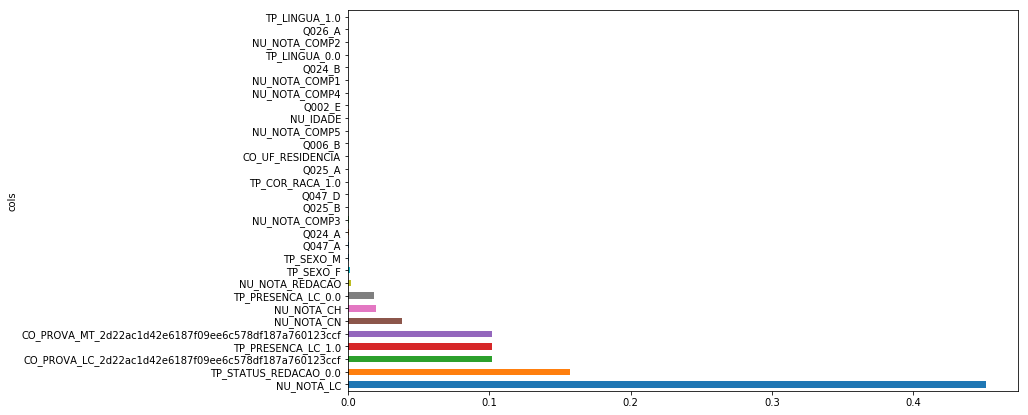

In [20]:
fi = rf_feat_importance(m, X_train_dummies);
plot_fi(fi[:30]);

In [21]:
to_keep = fi[fi.imp>0.005].cols; len(to_keep)
df_keep = X_train_dummies[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [22]:
m = RandomForestRegressor(n_estimators=100, min_samples_leaf=50, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[62.33781134631066, 63.994996767137785, 0.9255069504243223, 0.9218912991845519, 0.9205570612111759]


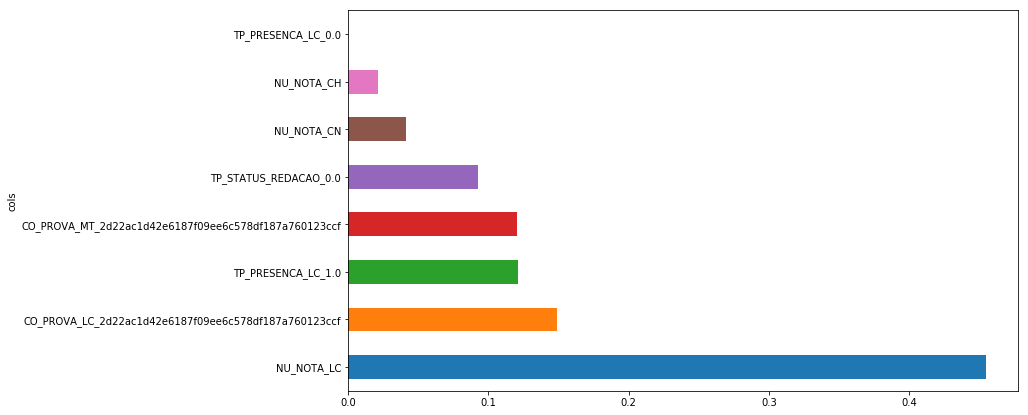

In [23]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [24]:
keep_columns = list(df_keep.columns); keep_columns

['NU_NOTA_LC',
 'TP_STATUS_REDACAO_0.0',
 'CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf',
 'TP_PRESENCA_LC_1.0',
 'CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'TP_PRESENCA_LC_0.0']

In [25]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=50, min_samples_leaf=5, 
           max_features=0.5, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [26]:
for c in list(keep_columns):
    print(c, get_oob(df_keep.drop(c, axis=1)))

NU_NOTA_LC 0.913778644506941
TP_STATUS_REDACAO_0.0 0.9163620989058998
CO_PROVA_LC_2d22ac1d42e6187f09ee6c578df187a760123ccf 0.9169104049663457
TP_PRESENCA_LC_1.0 0.9174146922738969
CO_PROVA_MT_2d22ac1d42e6187f09ee6c578df187a760123ccf 0.9163603555208311
NU_NOTA_CN 0.9032872171306942
NU_NOTA_CH 0.9136088589381828
TP_PRESENCA_LC_0.0 0.9171452500942827


In [27]:
X_test_keep = X_test_dummies.loc[:,keep_columns]

In [28]:
X_test_incricao = X_test['NU_INSCRICAO']

In [29]:
predictions_teste = pd.DataFrame(m.predict(X_test_keep))

In [30]:
df = pd.concat([X_test_incricao, predictions_teste], axis=1)

In [31]:
df.columns = ['NU_INSCRICAO','NU_NOTA_MT']

In [32]:
df.to_csv('answer_RF.csv', index=False, float_format='%.1f')

## Teste dos resultados

In [34]:
X_valid_keep = X_valid.loc[:,keep_columns]

In [35]:
predictions_valid = pd.DataFrame(m.predict(X_valid_keep))

In [44]:
test_valid = pd.concat([predictions_valid, y_valid], axis=1)
test_valid.to_csv('teste_RF.csv', index=False, float_format='%.1f')

In [64]:
np.mean((np.array(y_valid) - np.concatenate(np.array(predictions_valid)))**2)

4095.3596112259665

In [69]:
accuracy_score(y_valid, predictions_valid)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## Regressão Linear

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [42]:
pred_train = lm.predict(X_valid)

In [43]:
np.mean((np.array(y_valid) - pred_train)**2)

5023.679782141126

In [68]:
accuracy_score(np.array(y_valid), pred_train)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets